In [ ]:
#!pip install opencv-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generalidades

¿Cómo genero una matriz de números aleatorios entre 0 y 1, de tamaño 3x4?

In [3]:
M=np.random.uniform(-10,10,size=(3,4))

M

array([[-9.25058119, -0.61140469, -3.66988686,  2.47502446],
       [-9.06797978, -5.02722224, -7.63410743, -7.84522281],
       [ 6.99441381,  0.44883895, -3.05279168,  4.51326617]])

¿Cómo sumo todos los elementos de cada fila / columna?

In [5]:
np.sum(M,axis=1)

array([-11.05684828, -29.57453226,   8.90372724])

In [4]:
np.sum(M,axis=0)

array([-11.32414716,  -5.18978799, -14.35678596,  -0.85693218])

# Generemos unos datos de una mezcla de gaussianas

La idea es la siguiente: vamos a tener dos generadores de números aleatorios gaussianos, pero vamos a seleccionar entre ellos con una distribución binomial.


In [6]:
# Probabilidad de elegir distribución 0 o 1
phi=0.4

# Media y desviación estándar de la distribución 0
mu0=1
sd0=0.2

# Media y desviación estándar de la distribución 1
mu1=2.5
sd1=0.5

In [7]:
numsamples=(10000,1)

s0=np.random.normal(mu0,sd0,numsamples)
s1=np.random.normal(mu1,sd1,numsamples)

c=np.random.binomial(1,phi,numsamples)



In [8]:
s = s0*(1-c) + s1*c

(array([8.16315371e-03, 1.74924722e-02, 6.99698890e-02, 1.71426228e-01,
        3.25359984e-01, 6.05239539e-01, 8.33807843e-01, 1.09969342e+00,
        1.23613470e+00, 1.04721600e+00, 7.84828921e-01, 4.19819334e-01,
        2.65885578e-01, 1.14284152e-01, 8.74623612e-02, 9.09608556e-02,
        8.86285260e-02, 1.29444295e-01, 1.43438272e-01, 1.67927733e-01,
        2.21571315e-01, 2.47226941e-01, 2.57722424e-01, 2.84544215e-01,
        2.99704358e-01, 3.12532171e-01, 3.14864500e-01, 3.24193819e-01,
        3.21861489e-01, 2.62387084e-01, 2.35565293e-01, 1.74924722e-01,
        1.63263074e-01, 1.55099921e-01, 1.11951822e-01, 8.39638667e-02,
        5.36435815e-02, 3.96496037e-02, 3.14864500e-02, 1.74924722e-02,
        1.39939778e-02, 8.16315371e-03, 8.16315371e-03, 3.49849445e-03,
        5.83082408e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.16616482e-03]),
 array([0.2884152 , 0.37416637, 0.45991754, 0.54566871, 0.63141989,
        0.71717106, 0.8029

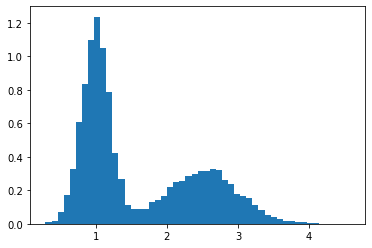

In [9]:
plt.hist(s,bins=50,density=True)

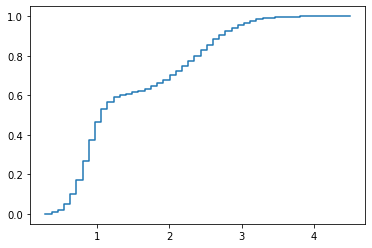

In [10]:
# 1. Cómo extraer un vector con el histograma
# 2. Cómo calcular la distribución acumulada

h,e = np.histogram(s,bins=50,density=True)
a = np.cumsum(h)
a=a/a[-1]
plt.step(e[:-1],a)

# Teorema del límite central

Para observar experimentalmente el teorema del límite central:

1. Genere varios sets de datos distribuidos uniformemente entre -1 y 1
   Use por ejemplo una matriz, donde cada fila contienen bastantes muestras 
2. Vaya incrementando paulatinamente el número de filas de la matriz de 1 a 100
3. Para cada número de filas, calcule la suma a lo largo de las columnas 
4. Grafique el histograma en cada caso
5. ¿Hacia qué converge la distribución?